In [1]:
import numpy as np
import pandas as pd

import wrangle as w
#import explore as e
#import model as m
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('figure', figsize=(13, 7))
plt.rc('font', size=16)

# Project Overview:
### Advancement in tornado casualty limiting technologies has made significant progress. These advancements include imporoved warning systems, updated building codes, public education, research, and community response. But how much are they helping?

### Following the Data Science pipeline, we will discover if these advancements have made an effect on casualties due to tornadoes.

# Goals:

* Acquire the data
* Prepare the data 
* Explore the data to find drivers of our target variable (casualties)
* Build time-series models to forecast drivers of caualties
* Validate, and then test our best model
* Deliver findings to a group of fellow data scientists

# Importing and Preparing Data

* data was originally aquired from https://www.kaggle.com/datasets/danbraswell/us-tornado-dataset-1950-2021
* the dataframe contains 67558 rows and 12
* zero rows were removed in cleaning
* 3 redundant columns were removed
* 2 were added, casualties and cas_per_mile
* columns renamed for readability

In [2]:
df, train, test = w.wrangle_tornado_data()

### A look at the data:

In [3]:
train.head()

,state,ef,injuries,fatalities,s_lat,s_lon,e_lat,e_lon,length,width,casualties,cas_per_mile
date,,,,,,,,,,,,
1950-01-03,IL,3,3,0,39.10,-89.30,39.12,-89.23,3.6,130,3,0.83
1950-01-03,MO,3,3,0,38.77,-90.22,38.83,-90.03,9.5,150,3,0.32
1950-01-03,OH,1,1,0,40.88,-84.58,0.00,0.00,0.1,10,1,10.00
1950-01-13,AR,3,1,1,34.40,-94.37,0.00,0.00,0.6,17,2,3.33
1950-01-25,IL,2,0,0,41.17,-87.33,0.00,0.00,0.1,100,0,0.00


In [4]:
train.shape

(54046, 12)

## Data Dictionary:

| Feature | Description |
| ------ | ----|
| state | U.S. State that the tornado touched-down in|
| ef | The Enhanced Fujita Rating of the tornado|
| injuries | Number of injuries do to the the tornado |
| fatalities | The amount of fatilities due to the tornado |
| s_lat | The latitude in decimal degrees of touchdown |
| s_lon | The longitude in decimal degrees of touchdown |
| e_lat | The latitude in decimal degrees of dissipation |
| e_lon | The longitude in decimal degrees of dissipation |
| length | The length of track in miles |
| width | The width of the tornado track in yards |
| casualties | The total of number of casualties (injuries + fatalities) |
| cas_per_mile | The total of number of casualties per mile of tornado travel |

## The Enhanced Fujita Scale (EF) Table:


| Rating | Wind Speed | Damage               |
|--------|-----------|---------------------|
| EF0    | 65–85 mph | Light damage         |
| EF1    | 86–110 mph| Moderate damage      |
| EF2    | 111–135 mph| Considerable damage |
| EF3    | 136–165 mph| Severe damage        |
| EF4    | 166–200 mph| Devastating damage   |
| EF5    | >200 mph  | Incredible damage    |

# Exploration

In [5]:
df_by_month = w.get_df_by_month(df)
train_by_month, test_by_month = w.split_data(df_by_month, train_size=0.8)
y = train_by_month.casualties

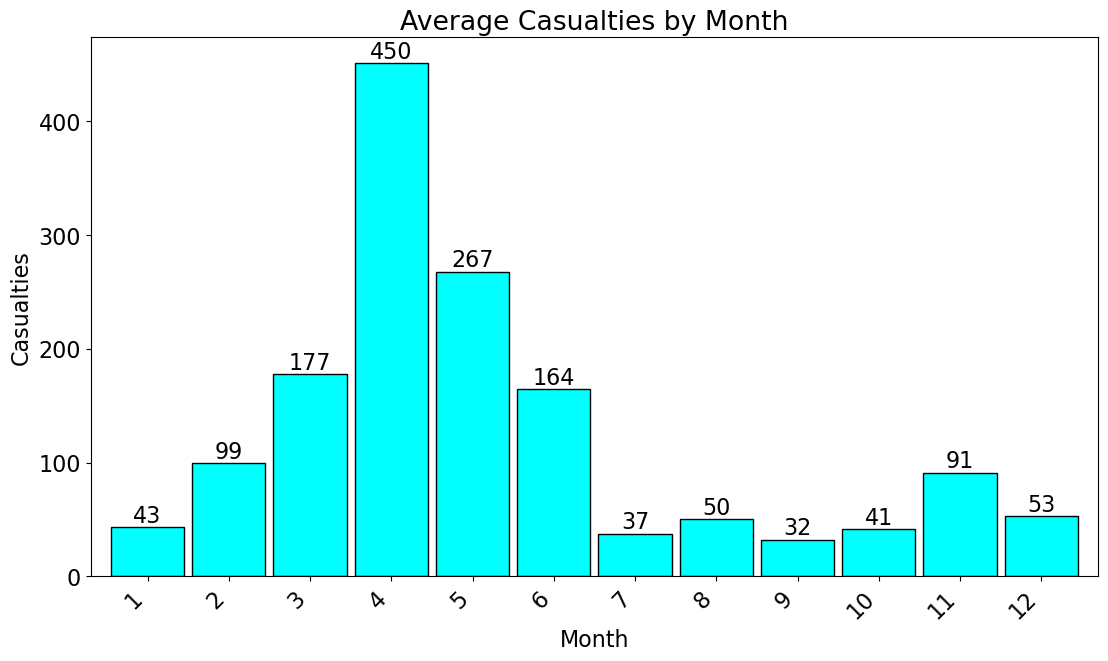

In [6]:
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, color='cyan', ec='black')
plt.xticks(rotation=45, ha='right')
ax.set(title='Average Casualties by Month', xlabel='Month', ylabel='Casualties')

# Display the total for each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=[f'{int(j.get_height())}' for j in i])

**Takeaways**

Here we see averge casualties by month. April is clearly the most dangerous month for tonado casualties, last summer, fall, and winter months are much lower in terms of casualty count.

In [7]:
df_by_year = w.get_df_by_year(df)
train_by_year, test_by_year = w.split_data(df_by_year, train_size=0.8)

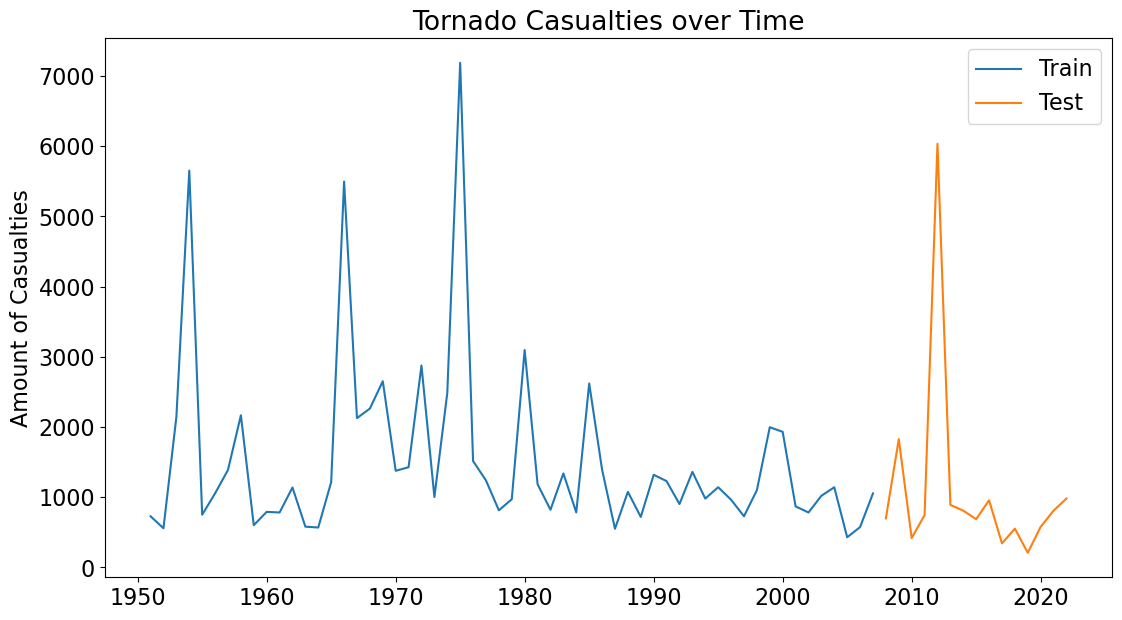

In [8]:
plt.plot(train_by_year.index, train_by_year.casualties)
plt.plot(test_by_year.index, test_by_year.casualties)
plt.title('Tornado Casualties over Time')
plt.ylabel('Amount of Casualties')
plt.legend(['Train','Test'])
plt.show()

**Takeaways**

Visualized here is our data split of the target variable, casualties. We can see that since 1950, regardless of all the advancement, we still have relatively consistant casualty spikes with a slight lull between 1980 and 2011. 

In [9]:
df_by_decade = w.get_df_by_decade(df)
train_by_decade, test_by_decade = w.split_data(df_by_decade, train_size=0.8)

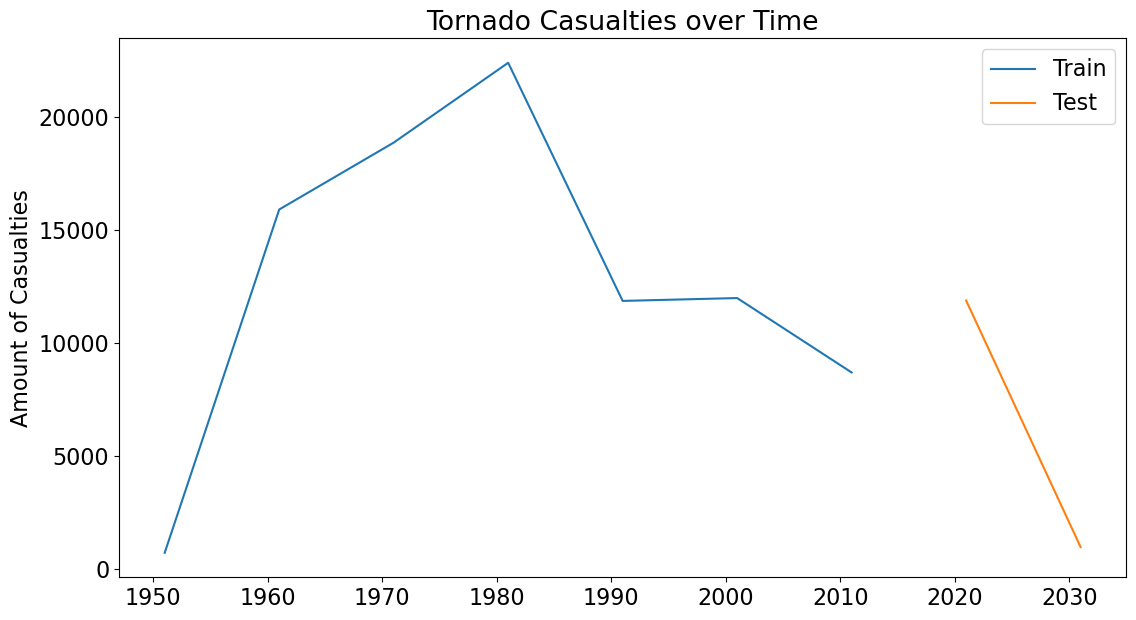

In [11]:
plt.plot(train_by_decade.index, train_by_decade.casualties)
plt.plot(test_by_decade.index, test_by_decade.casualties)
plt.title('Tornado Casualties over Time')
plt.ylabel('Amount of Casualties')
plt.legend(['Train','Test'])
plt.show()

**Takeaways**



# Modeling
* Additional preperation was required for modeling:
    * 
    * 
    * 

### Baseline

## Test

## Conclusion
* 


* 

## Recommendations:

* 

## Next Steps:

* 